
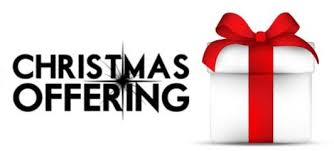
# **Customer Segmentation**

Problem Statement:  XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

ML Problem: ABC analytics proposed customer segmentation approach to Bank.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior customer in one category and others in different category.

Note: Please read problem statement carefully and propose the approach which should be as per the customer requirement.

# **Task:**

1. Business Understanding

2. Data Understanding

3. EDA

4. Feature Engineering

4. Model Building

5. Model Evaluation

6. Presentation (Recommendation slide is must)

7. Document the challenges

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as snsda
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
#import pycountry_convert as pc
sns.set(rc={'figure.figsize':(11,9)})
sns.set_theme('notebook')
sns.set_style('white')
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
#from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder


# GPU processing


In [ ]:
!nvidia-smi

Mon Nov 21 14:38:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install pynvml
import pynvml

pynvml.nvmlInit()
handle = pynvml.nvmlDeviceGetHandleByIndex(0)
device_name = pynvml.nvmlDeviceGetName(handle)

if device_name != b'Tesla T4':
  raise Exception("""
    Unfortunately this instance does not have a T4 GPU.
    
    Please make sure you've configured Colab to request a GPU instance type.
    
    Sometimes Colab allocates a Tesla K80 instead of a T4. Resetting the instance.

    If you get a K80 GPU, try Runtime -> Reset all runtimes...
  """)
else:
  print('Woo! You got the right kind of GPU!')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 4.1 MB/s 
Woo! You got the right kind of GPU!


In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
#!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!git clone https://github.com/rapidsai-community/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_6

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 37.0.4
Uninstalling cryptography-37.0.4:
  Successfully uninstalled cryptography-37.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.1/427.1 kB 20.4 MB/s eta 0:00:00
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.2
    - dask-sql
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.12


The following package

# Kmeans

In [ ]:
# Critical imports
import  cudf
import cuml
import cupy
import os
import numpy as np
import pandas as pd
from cuml.cluster import DBSCAN as cumlDBSCAN
from cuml.cluster import KMeans as cumlKMeans
from cuml.cluster import AgglomerativeClustering as cumlAgglomerativeClustering
from cuml.decomposition import PCA as cumlPCA
from cuml.preprocessing import MinMaxScaler as cumlMinMaxScaler
from cuml.pipeline import Pipeline as cumlPipeline
from cuml.metrics.cluster import silhouette_score as cumlSilhouette_score
import cupy as cp
print('cuml version:', cuml.__version__, ', cudf version:', cudf.__version__)

cuml version: 21.12.00 , cudf version: 21.12.02


In [ ]:
# read CSV from memory
cudf_data = cudf.read_csv('/content/drive/MyDrive/Glacier_project/customersegment.csv',index_col=0,dtype='float')
cudf_data

In [ ]:
cudf_data.drop(columns=['month','Customer code'],inplace=True,axis=1)

In [ ]:
n_components=2
preprocessor = cumlPipeline([("scaler", cumlMinMaxScaler()),("pca", cumlPCA(n_components=n_components, random_state=1)),])
clusterer = cumlPipeline([('Kmeans',cumlKMeans(n_clusters=5,init="k-means++"))])
pipe = cumlPipeline([("preprocessor", preprocessor),("clusterer", clusterer)])


In [ ]:
pipe.fit(cudf_data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA())])),
                ('clusterer', Pipeline(steps=[('Kmeans', KMeans())]))])

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(cudf_data.values)
#silhouette_score(preprocessed_data, predicted_labels)
predicted_labels = pipe["clusterer"]["Kmeans"].labels_
pcadf_kmean = pd.DataFrame(
       preprocessed_data)
pcadf_kmean.columns=['component_1','component_2']

In [ ]:
pcadf_kmean.head(2)

,component_1,component_2
0,0.2821455218354502,0.7511742447971893
1,-0.8627998436758643,-0.4526898180001542


In [ ]:
pcadf_kmean["kmeans_labels"] = pipe["clusterer"]["Kmeans"].labels_.to_numpy()
#pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

In [ ]:
pcadf_kmean.sample(5)

,component_1,component_2,kmeans_labels
885375,0.5853033182034351,-0.6847873022692051,1
612348,0.3543461358545956,0.319206685247482,3
858926,1.0042606140194381,0.5935181471950823,4
476514,-0.7567492379552411,0.7096495379926229,2
50902,1.0328857949595487,0.5338112017451565,4


In [ ]:
#S=(b–a)/max(a,b): a:mean intra-cluster distance,b: mean nearest-cluster distance.
#The value of Silhouette score varies from -1 to 1. If the score is 1, 
#the cluster is dense and well-separated than other clusters. 
#A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters.
# A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.
silhouettescore_kmean=cumlSilhouette_score(cupy.float32(preprocessed_data.get()), cupy.float32(predicted_labels.values.get()))

In [ ]:
print(f'Silhoiett_score_kmean:{silhouettescore_kmean}')

Silhoiett_score_kmean:0.7433198094367981


In [ ]:
# we use plotlablib  to plot the figures because it is much better for big data, using another library will make it crach 

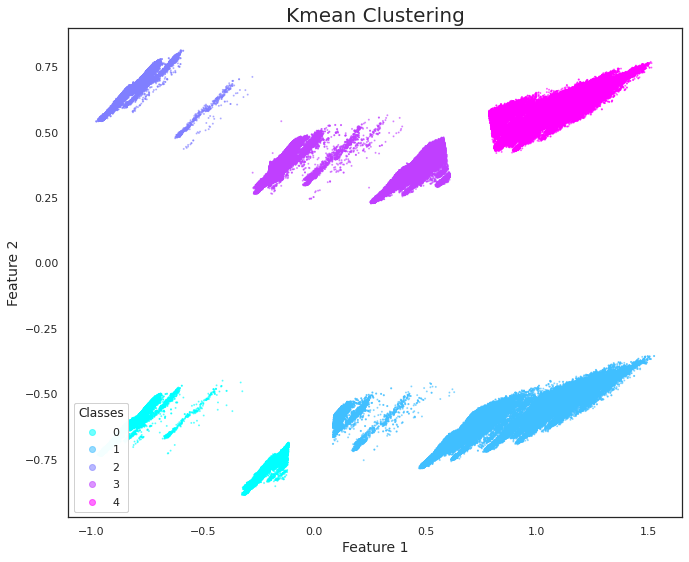

In [ ]:
# Plotting resulting clusters
fig,ax=plt.subplots()
scatter=ax.scatter(pcadf_kmean.iloc[:, 0], pcadf_kmean.iloc[:, 1], s=1, alpha=0.5,c=pcadf_kmean.iloc[:, 2],cmap='cool')
plt.title('Kmean Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

In [ ]:
fig.savefig('/content/drive/MyDrive/Glacier_project/kmean.png')

# AgglomerativeClustering

In [ ]:
n_components=2
preprocessor = cumlPipeline([("scaler", cumlMinMaxScaler()),("pca", cumlPCA(n_components=n_components, random_state=1)),])
clusterer = cumlPipeline([('Agg',cumlAgglomerativeClustering(n_clusters=5))])
pipe = cumlPipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(cudf_data)
preprocessed_data = pipe["preprocessor"].transform(cudf_data.values)
#silhouette_score(preprocessed_data, predicted_labels)
predicted_labels = pipe["clusterer"]["Agg"].labels_
pcadf_agg = pd.DataFrame(
pipe["preprocessor"].transform(cudf_data.values),
columns=[f'component_{i}' for i in np.arange(1,n_components+1,1)])
pcadf_agg["Agg_labels"] = pipe["clusterer"]["Agg"].labels_.to_numpy()
#pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

In [ ]:
#S=(b–a)/max(a,b): a:mean intra-cluster distance,b: mean nearest-cluster distance.
#The value of Silhouette score varies from -1 to 1. If the score is 1, 
#the cluster is dense and well-separated than other clusters. 
#A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters.
# A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.
silhouettescore=cumlSilhouette_score(cupy.float32(preprocessed_data.get()), cupy.float32(predicted_labels.values.get()))

In [ ]:
print(f'Silhoiett_score_AGG:{silhouettescore}')

Silhoiett_score_AGG:0.5956649780273438


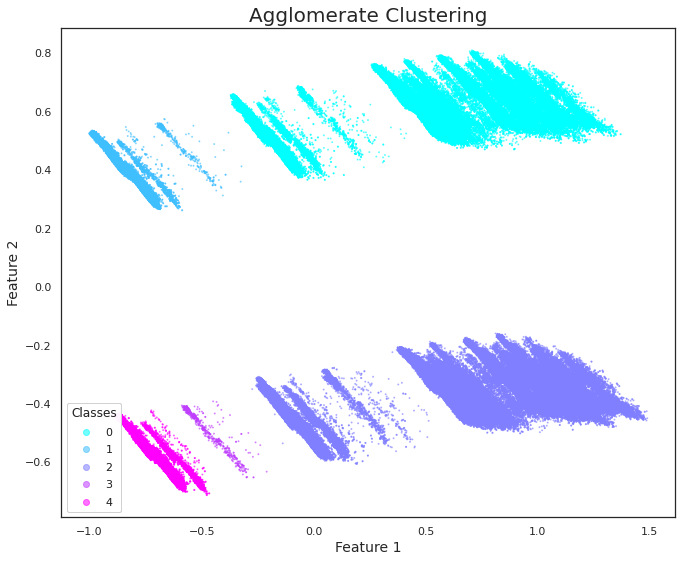

In [ ]:
# Plotting resulting clusters
fig,ax=plt.subplots()
scatter=ax.scatter(pcadf_agg.iloc[:, 0], pcadf_agg.iloc[:, 1], s=1, alpha=0.5,c=pcadf_agg.iloc[:, 2],cmap='cool')
plt.title('Agglomerate Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()


In [ ]:
fig.savefig('/content/drive/MyDrive/Glacier_project/agg.png')

In [ ]:
cudf_data["Agg_labels"] = pcadf_agg["Agg_labels"]
cudf_data["kmeans_labels"] = pcadf_kmean["kmeans_labels"]

cudf_data.to_csv('/content/drive/MyDrive/Glacier_project/cuda_data_agg_keman.csv')